In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'/Volumes/HP X900W/data/data.csv') # or wherever it is...

In [3]:
df.head()

,game_id,fen,repetition,max_time,increment,W_time,B_time,W_elo,B_elo,past_move1,past_move2,past_move3,past_move4,next_move,time_rem,outcome
0,Nv1Ghy7F,rnbqkb1r/p2ppppp/5n2/2pP4/2B5/4P3/PP3PPP/RNBQK...,F,180,0,174,173,1968,1975,b7b5,e2e3,b5c4,f1c4,d7d6,172,B
1,Nv1Ghy7F,r1bqkb1r/p2npppp/3p1n2/2pP4/2B5/4P3/PP2NPPP/RN...,F,180,0,172,170,1968,1975,f1c4,d7d6,g1e2,b8d7,e1g1,171,B
2,Nv1Ghy7F,r1bqkb1r/p2npp1p/3p1np1/2pP4/2B5/2N1P3/PP2NPPP...,F,180,0,169,169,1968,1975,b8d7,e1g1,g7g6,b1c3,f8g7,168,B
3,Nv1Ghy7F,r1bqk2r/p2nppbp/3p1np1/2pP4/2B5/2N1P3/PP2NPPP/...,F,180,0,169,168,1968,1975,e1g1,g7g6,b1c3,f8g7,b2b3,168,B
4,Nv1Ghy7F,r1bqk2r/p2nppbp/3p1np1/2pP4/2B5/1PN1P3/P3NPPP/...,F,180,0,168,168,1968,1975,g7g6,b1c3,f8g7,b2b3,d7b6,156,B


Text(0.5, 1.0, 'Max Time')

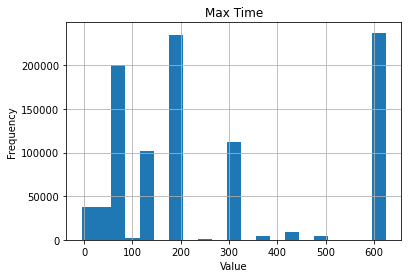

In [4]:
df['max_time'].hist(bins=np.arange(-5, 635, 30)) # Adjust 'bins' as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Max Time')

# Likely augmentation: 1/3 bullet, 1/3 blitz, 1 rapid

Text(0.5, 1.0, 'Time Remaining')

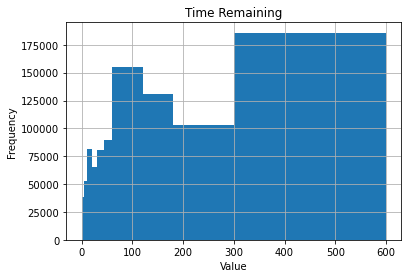

In [5]:
df['W_time'].hist(bins=[0,5,10,20,30,45,60,120,180,300,600]) # Adjust 'bins' as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Time Remaining')

# Likely augmentation: N/A

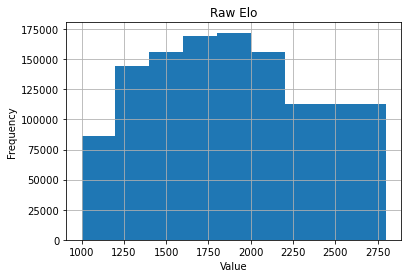

In [6]:
h = df['W_elo'].hist(bins=[1000,1200,1400,1600,1800,2000,2200,2800]) # Adjust 'bins' as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Raw Elo');

# Likely augmentation: 0.8x 1200-1400, 0.55x 1400-1600, 0.5x 1600-2000, 0.7x 2000-2200

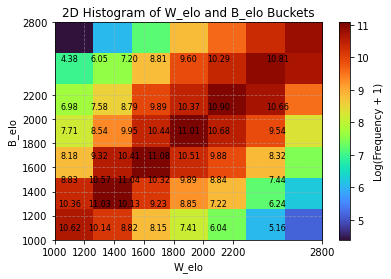

In [7]:
bins = [1000, 1200, 1400, 1600, 1800, 2000, 2200, 2800]

# Create 2D histogram
hist2d, xedges, yedges = np.histogram2d(
    df['W_elo'], df['B_elo'], bins=[bins, bins]
)
plt.imshow(
    np.log1p(hist2d.T),  # Apply log scale (log(1+x) to handle 0 counts)
    origin='lower',
    cmap='turbo',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    aspect='auto'
)

plt.colorbar(label='Log(Frequency + 1)')
plt.xlabel('W_elo')
plt.ylabel('B_elo')
plt.title('2D Histogram of W_elo and B_elo Buckets')
plt.xticks(bins)
plt.yticks(bins)
plt.grid(alpha=0.5, linestyle='--')


for i in range(len(xedges) - 1):
    for j in range(len(yedges) - 1):
        # Get the log value for each bin
        log_value = np.log1p(hist2d.T[j, i])
        if hist2d.T[j, i] > 0:  # Avoid showing log(0)
            plt.text(
                (xedges[i] + xedges[i + 1]) / 2,  # X position (center of bin)
                (yedges[j] + yedges[j + 1]) / 2,  # Y position (center of bin)
                f"{log_value:.2f}",  # Format to 2 decimal places
                color='black',
                ha='center',
                va='center',
                fontsize=8
            )
# Augmentation: to itself (the diagonal) 1/10, 1-off 1/2

[('rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR', 13), ('rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R', 11), ('8/8/8/8/8/6kp/8/6K1', 10), ('8/8/8/8/8/6kp/8/7K', 10), ('r1bqkb1r/p4ppp/2p2n2/nB2p1N1/8/8/PPPP1PPP/RNBQK2R', 9), ('8/8/8/8/6k1/7p/7K/8', 9), ('r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R', 9), ('rnbqkb1r/pp2pppp/3p1n2/8/3NP3/2N5/PPP2PPP/R1BQKB1R', 8), ('rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR', 8), ('r1bq1rk1/pp2ppbp/2np1np1/8/3NP3/2N1BP2/PPPQ2PP/R3KB1R', 8)]


/var/folders/vr/3rfvd57528n81p6z21_04q5w0000gn/T/ipykernel_20147/4167330434.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


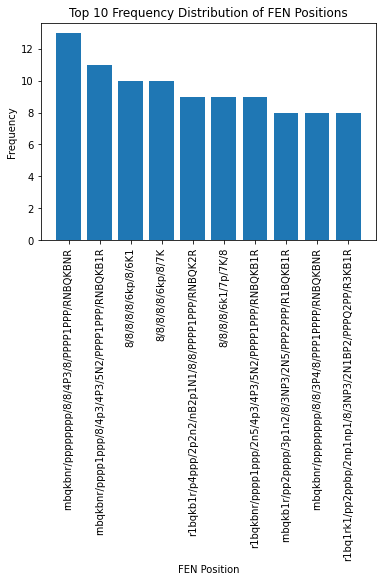

In [8]:
from collections import Counter

# Extract the first part of each FEN (the board position)
fen_positions = [fen.split()[0] for fen in df['fen']]

# Count the frequencies of each unique board position
fen_counter = Counter(fen_positions)

top_10 = fen_counter.most_common(10)
print(top_10)

# Extract positions and frequencies for the top 10
positions, frequencies = zip(*top_10)

# Plot the frequency distribution for the top 10
plt.bar(positions, frequencies)
plt.xlabel('FEN Position')
plt.ylabel('Frequency')
plt.title('Top 10 Frequency Distribution of FEN Positions')
plt.xticks(rotation=90)
plt.tight_layout()